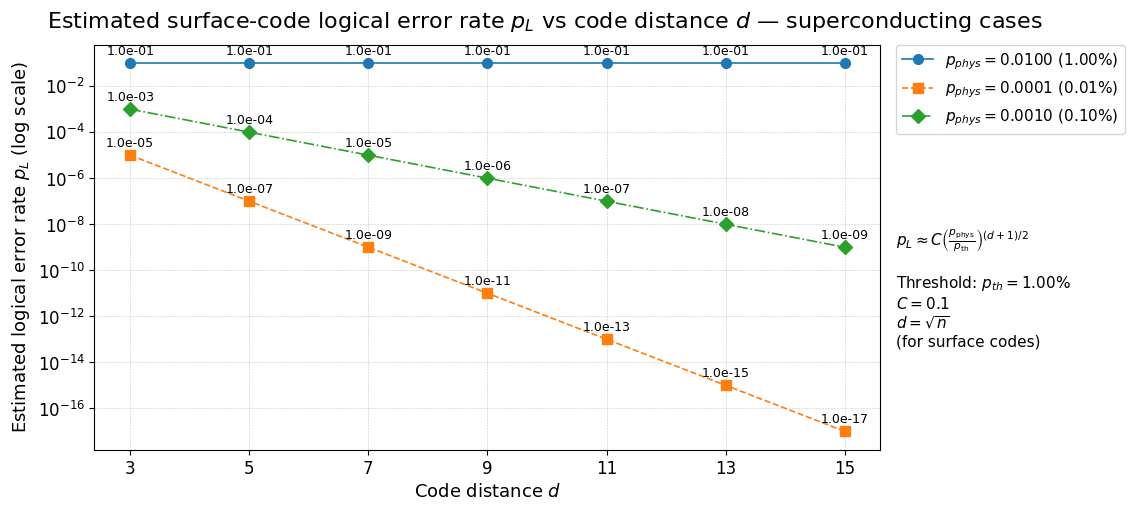

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p_th = 0.01  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.01%)': 0.0001,
    'optimal (0.10%)': 0.001
}
models = {
    # 'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

# dynamically set number of rows
n_models = len(models)
fig, axs = plt.subplots(n_models, 1, figsize=(12, 5 * n_models), sharex=True)

# make axs always iterable (even if only one subplot)
if n_models == 1:
    axs = [axs]

# main title (increase y a little for more gap)
fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases",
             y=0.99)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)

        # Plot the curve
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=1.2, markersize=7, 
                label=f"$p_{{phys}} = {p:.4f}$ ({p*100:.2f}%)")

        # Annotate each point with exact p_L value
        for (d, val) in zip(distances, p_Ls):
            ax.annotate(f"{val:.1e}", 
                        (d, val), 
                        textcoords="offset points", 
                        xytext=(0, 6),
                        ha='center', fontsize=9, color="black")

    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$")
    ax.set_ylabel("Estimated logical error rate $p_L$ (log scale)")
    ax.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.7)
    ax.set_xticks(distances)

    # Legend outside on right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

    # Formula + threshold box with extras
    formula = (
        r"$p_L \approx C\left(\frac{p_{\mathrm{phys}}}{p_{\mathrm{th}}}\right)^{(d+1)/2}$"
        f"\n\nThreshold: $p_{{th}} = {p_th*100:.2f}\\%$"
        f"\n$C = {C}$\n"
        r"$d = \sqrt{n}$"
        "\n(for surface codes)"
    )
    ax.text(1.02, 0.55, formula, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'))

# adjust spacing
plt.subplots_adjust(hspace=0.4, right=0.78, top=0.92)
plt.show()


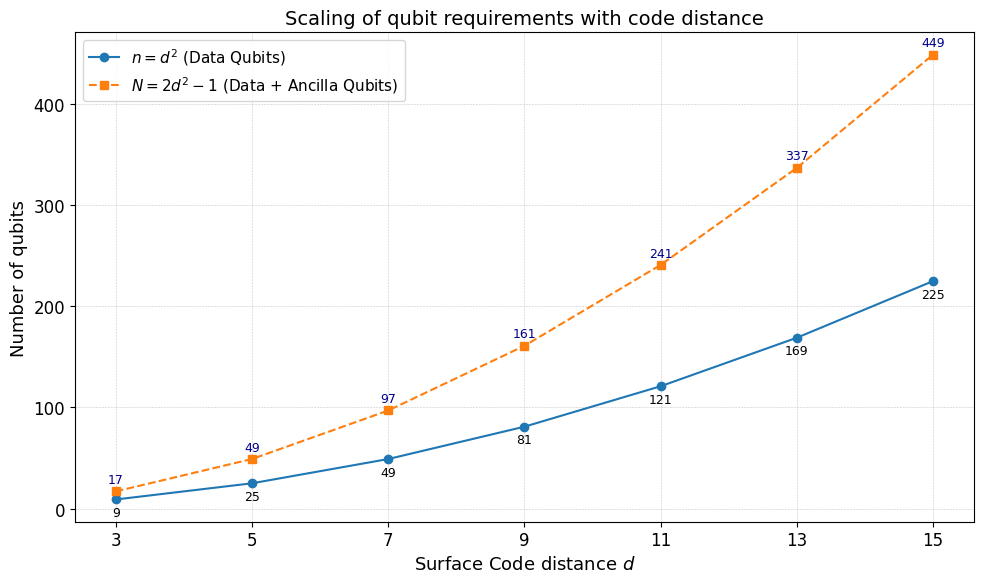

In [2]:
import numpy as np
import matplotlib.pyplot as plt

distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15

# relations
n_phys = distances**2
n_total = 2*distances**2 - 1

plt.figure(figsize=(10, 6))
plt.plot(distances, n_phys, marker='o', linestyle='-', linewidth=1.5, label=r"$n = d^2$ (Data Qubits)")
plt.plot(distances, n_total, marker='s', linestyle='--', linewidth=1.5, label=r"$N = 2d^2 - 1$ (Data + Ancilla Qubits)")

# annotate points
for d, n, N in zip(distances, n_phys, n_total):
    plt.annotate(str(n), (d, n), textcoords="offset points", xytext=(0, -12), ha='center', fontsize=9)
    plt.annotate(str(N), (d, N), textcoords="offset points", xytext=(0, 6), ha='center', fontsize=9, color="darkblue")

plt.xlabel("Surface Code distance $d$")
plt.ylabel("Number of qubits")
plt.title("Scaling of qubit requirements with code distance")
plt.grid(linestyle="--", linewidth=0.4, alpha=0.7)
plt.legend()

# force x-axis to show only odd distances
plt.xticks(distances)

plt.tight_layout()
plt.show()
